### Importing libraries


In [ ]:
import tensorflow as tf
import numpy as np

from keras.datasets import mnist # dataset import

from keras.models import Sequential # model creation
from keras.layers import Dense

from keras.utils import to_categorical

from matplotlib import pyplot as plt # plt to plot the images
%matplotlib inline

print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.15.0


### Pre-processing data

In [ ]:
# loading dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# one hot encoding
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# unrolling N-dimensional arrays to vectors
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

# normalizing data
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped -  x_mean) / (x_std + epsilon)

### Model creation

In [ ]:
model = Sequential([
    Dense(128, activation = 'relu', input_shape = (784,)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

### Training the model

In [ ]:
# training the model with the pre-processed data
model.fit(x_train_norm, y_train_encoded, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3601 - accuracy: 0.8946
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1784 - accuracy: 0.9475
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1345 - accuracy: 0.9605


In [ ]:
# evaluating the model
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('Test set accuracy:', accuracy*100)

313/313 [==============================] - 1s 2ms/step - loss: 0.1260 - accuracy: 0.9625
Test set accuracy: 96.24999761581421


### Testing the model

313/313 [==============================] - 1s 2ms/step




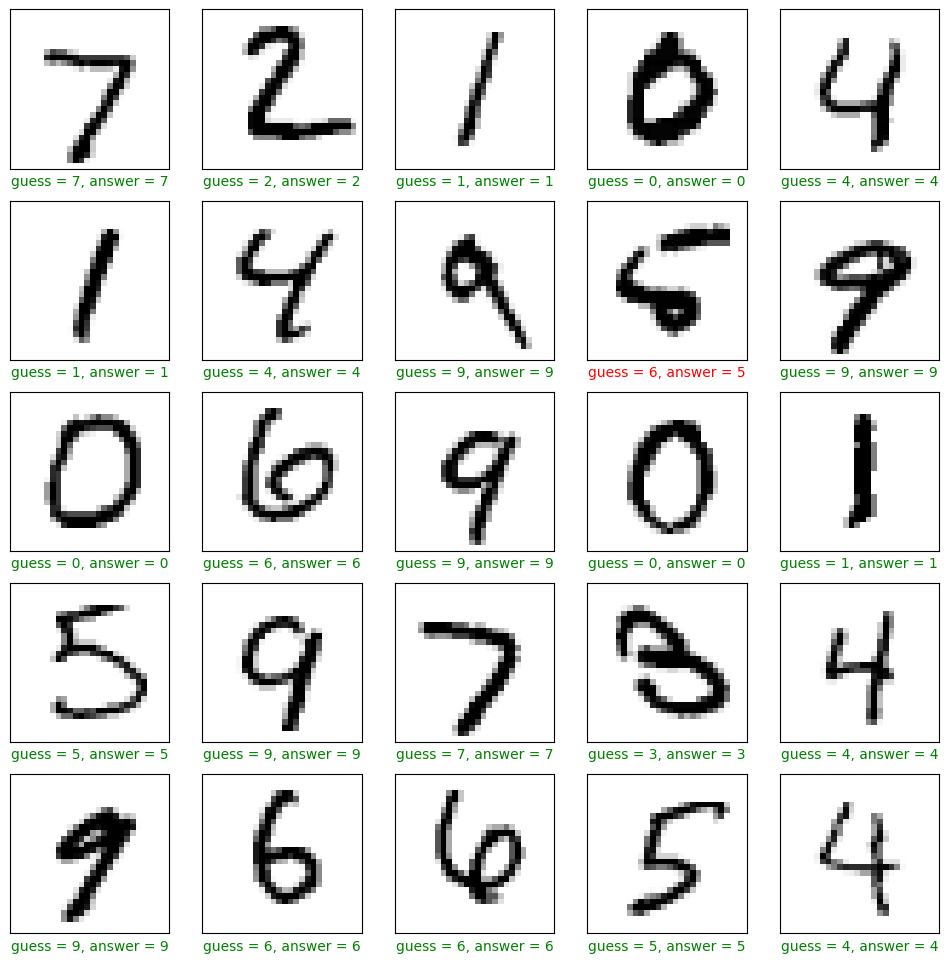

In [ ]:
preds = model.predict(x_test_norm)

plt.figure(figsize=(12,12))

start_index = 0

print('\n')

# if you'd like to see more examples, just adjust the interval of i
# here, we are plotting the first 25 examples
for i in range (25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    pred = np.argmax(preds[start_index+i])
    gt = y_test[start_index+i]

    col = 'g'
    if pred != gt:
        col ='r'

    plt.xlabel('guess = {}, answer = {}'.format(pred, gt), color = col)
    plt.imshow(x_test[start_index+i], cmap = 'binary')

plt.show()